In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def proyectar_sobre_plano(v, u1, u2):
    """
    Proyecta el vector v sobre el plano generado por u1 y u2.
    P = U (U^T U)^{-1} U^T, donde U = [u1 u2].
    """
    U = np.column_stack((u1, u2))
    G = U.T @ U
    G_inv = np.linalg.inv(G)
    P = U @ G_inv @ U.T
    return P @ v

def graficar_vector(ax, v, color='r', label=None):
    """Grafica un vector v desde el origen en Axes3D."""
    ax.quiver(0, 0, 0, v[0], v[1], v[2],
              color=color, arrow_length_ratio=0.15, label=label)

def graficar_plano(ax, u1, u2, color='cyan', alpha=0.3):
    """Grafica un plano generado por u1 y u2."""
    t = np.linspace(-1, 1, 5)
    s = np.linspace(-1, 1, 5)

    X = np.zeros((len(t), len(s)))
    Y = np.zeros((len(t), len(s)))
    Z = np.zeros((len(t), len(s)))

    for i in range(len(t)):
        for j in range(len(s)):
            w = t[i]*u1 + s[j]*u2
            X[i, j] = w[0]
            Y[i, j] = w[1]
            Z[i, j] = w[2]

    ax.plot_surface(X, Y, Z, color=color, alpha=alpha)

def configurar_escena_3d(ax):
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)

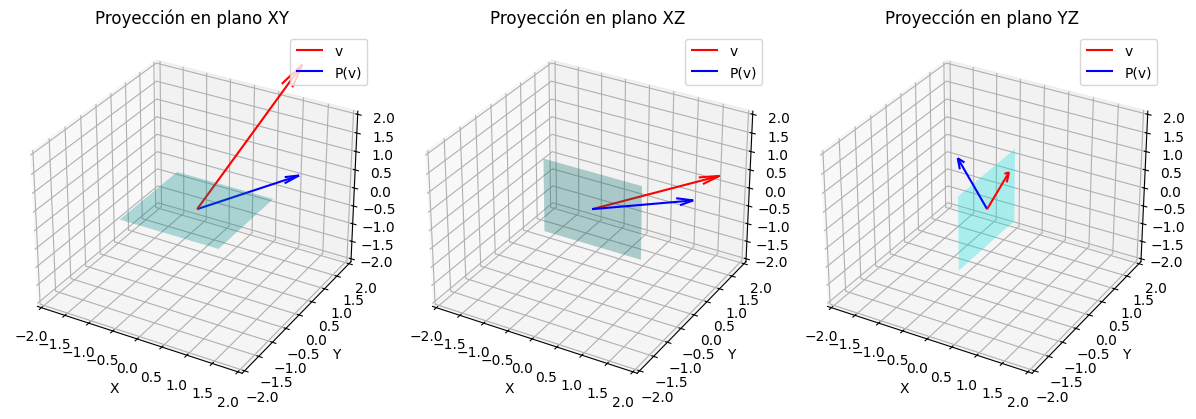

In [14]:
fig = plt.figure(figsize=(12, 4))

# Ejemplo 1: Plano XY
u1_xy = np.array([1, 0, 0])
u2_xy = np.array([0, 1, 0])
v_xy = np.array([1, 2, 3])  # Vector a proyectar sobre XY
v_xy_proj = proyectar_sobre_plano(v_xy, u1_xy, u2_xy)

ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('Proyección en plano XY')
configurar_escena_3d(ax1)
graficar_vector(ax1, v_xy, color='r', label='v')
graficar_vector(ax1, v_xy_proj, color='b', label='P(v)')
graficar_plano(ax1, u1_xy, u2_xy, 'cyan', 0.3)
ax1.legend()

# Ejemplo 2: Plano XZ
u1_xz = np.array([1, 0, 0])
u2_xz = np.array([0, 0, 1])
v_xz = np.array([2, 1, 1])  # Vector a proyectar sobre XZ
v_xz_proj = proyectar_sobre_plano(v_xz, u1_xz, u2_xz)

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('Proyección en plano XZ')
configurar_escena_3d(ax2)
graficar_vector(ax2, v_xz, color='r', label='v')
graficar_vector(ax2, v_xz_proj, color='b', label='P(v)')
graficar_plano(ax2, u1_xz, u2_xz, 'cyan', 0.3)
ax2.legend()

# Ejemplo 3: Plano YZ
u1_yz = np.array([0, 1, 0])
u2_yz = np.array([0, 0, 1])
v_yz = np.array([1, -1, 2])  # Vector a proyectar sobre YZ
v_yz_proj = proyectar_sobre_plano(v_yz, u1_yz, u2_yz)

ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title('Proyección en plano YZ')
configurar_escena_3d(ax3)
graficar_vector(ax3, v_yz, color='r', label='v')
graficar_vector(ax3, v_yz_proj, color='b', label='P(v)')
graficar_plano(ax3, u1_yz, u2_yz, 'cyan', 0.3)
ax3.legend()

plt.tight_layout()